In [14]:
import torch
import torch.optim as optim
import torchvision.transforms.functional as FT
from tqdm import tqdm
from torch.utils.data import DataLoader
from model import ResNet18
import os
from dataset import cifarDataset
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd

# Hyperparameters
lr = 2e-5
batch_size = 1000
weight_decay = 1e-4
epochs = 30
transform = transforms.ToTensor()
train_accuracy = []
test_accuracy = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def train_fn(train_loader, model, optimizer, loss_fn):
    model.train()
    loop = tqdm(train_loader, leave=True)

    correct = 0
    total = 0

    for batch_idx, (x, y) in enumerate(loop):
        x,y = x.to(device), y.to(device)
        out = model(x)
        loss = loss_fn(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        correct += int(sum(out.argmax(axis=1) == y))
        total += y.size(0)

        # Update the progress bar
        loop.set_postfix(loss=loss.item())

    accu = 100. * (correct / total)
    train_accuracy.append(accu)


def test_fn(test_loader, model):
    model.eval()
    loop = tqdm(test_loader)

    correct = 0
    total = 0

    with torch.no_grad():
        for batch_idx, (x, y) in enumerate(loop):
            x,y = x.to(device), y.to(device)
            out = model(x)
            correct += int(sum(out.argmax(axis=1) == y))
            total += y.size(0)

    accu = 100. * (correct / total)
    test_accuracy.append(accu)


def main():
    torch.cuda.empty_cache()
    model = ResNet18()
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = nn.CrossEntropyLoss()

    dir_name = "dataset"
    csv = "data/cifar100_nl_clean.csv"
    csv_test = "data/cifar100_nl_test.csv"
    dataset = cifarDataset(csv=csv, dir_name=dir_name, transform=transform)
    test_set = cifarDataset(csv=csv_test, dir_name=dir_name,
                            transform=transform)
    train_set, val_set = torch.utils.data.random_split(dataset, [40000, 9998])
    train_loader = DataLoader(dataset=train_set,
                              batch_size=batch_size,
                              shuffle=True,
                              drop_last=False)
    val_loader = DataLoader(dataset=val_set,
                            batch_size=batch_size,
                            shuffle=True,
                            drop_last=False)
    test_loader = DataLoader(dataset=test_set,
                             batch_size=batch_size,
                             shuffle=False)

    for epoch in range(epochs):
        train_fn(train_loader, model, optimizer, loss_fn)
        test_fn(test_loader, model)
        
    torch.save(model.state_dict(), "modelStates/baseModel.pth")

In [15]:
main()

100%|██████████| 10/10 [00:04<00:00,  2.30it/s]


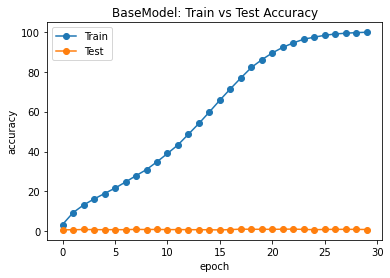

In [20]:
plt.plot(train_accuracy, '-o')
plt.plot(test_accuracy, '-o')
plt.legend(['Train','Test'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('BaseModel: Train vs Test Accuracy')
plt.show()

In [17]:
baseModelScores = pd.DataFrame({"train_accuracy":train_accuracy, "test_accuracy":test_accuracy})
baseModelScores

,train_accuracy,test_accuracy
0,3.4150,0.780156
1,9.3500,0.780156
2,13.1950,0.920184
3,16.2075,0.850170
4,18.9450,0.820164
5,21.6625,0.840168
6,24.7100,0.820164
7,27.9000,0.990198
8,30.9700,0.890178
9,34.8550,0.960192


In [19]:
baseModelScores.iloc[::2,:]

,train_accuracy,test_accuracy
0,3.4150,0.780156
2,13.1950,0.920184
4,18.9450,0.820164
6,24.7100,0.820164
8,30.9700,0.890178
10,39.0275,0.850170
12,48.7175,0.830166
14,59.8900,0.780156
16,71.4775,0.860172
18,82.1800,1.020204


In [48]:
import torch
import torch.optim as optim
import torchvision.transforms.functional as FT
from torchvision.datasets import CIFAR100
from tqdm import tqdm
from torch.utils.data import DataLoader
from model import ResNet18
import os
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd

# Hyperparameters
lr = 2e-5
batch_size = 1000
weight_decay = 1e-4
epochs = 50
transform = transforms.ToTensor()
train_accuracy = []
test_accuracy = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_fn(train_loader, model, optimizer, loss_fn):
    model.train()
    loop = tqdm(train_loader, leave=True)

    correct = 0
    total = 0

    for batch_idx, (x, y) in enumerate(loop):
        x,y = x.to(device), y.to(device)
        out = model(x)
        loss = loss_fn(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        correct += int(sum(out.argmax(axis=1) == y))
        total += y.size(0)

        # Update the progress bar
        loop.set_postfix(loss=loss.item())

    accu = 100. * (correct / total)
    train_accuracy.append(accu)

torch.cuda.empty_cache()
model = ResNet18()
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
loss_fn = nn.CrossEntropyLoss()

dataset = CIFAR100(download=True,root="./trueCIFAR100",transform=transform)
train_set,_ = torch.utils.data.random_split(dataset, [5000, 45000])
train_loader = DataLoader(dataset=train_set,
                          batch_size=batch_size,
                          shuffle=True,
                          drop_last=False)

for epoch in range(epochs):
    train_fn(train_loader, model, optimizer, loss_fn)
torch.save(model.state_dict(), "modelStates/supervisorModel.pth")

Files already downloaded and verified


100%|██████████| 5/5 [00:02<00:00,  1.77it/s, loss=0.312]


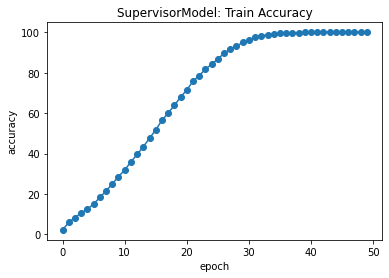

In [49]:
plt.plot(train_accuracy, '-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('SupervisorModel: Train Accuracy')
plt.show()

In [50]:
supervisorModelScores = pd.DataFrame({"train_accuracy":train_accuracy})
supervisorModelScores

,train_accuracy
0,2.26
1,6.00
2,8.38
3,10.62
4,12.54
5,15.04
6,18.30
7,21.54
8,24.98
9,28.60


In [55]:
supervisorModelScores.iloc[:30:2,:]

,train_accuracy
0,2.26
2,8.38
4,12.54
6,18.30
8,24.98
10,31.88
12,39.60
14,47.60
16,56.40
18,63.80


In [56]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import cv2
import os
import pandas as pd
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [57]:
import torchvision

In [58]:
class cifarDataset(Dataset):
    def __init__(self, csv, dir_name, transform=None):
        self.annotations = pd.read_csv(os.path.join(dir_name, csv))
        self.dir_name = dir_name
        self.transform = transform
        self.num_to_word = dict(enumerate(self.annotations.iloc[:,1].unique()))
        self.word_to_num = {value:key for (key,value) in self.num_to_word.items()}

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        image_path = self.annotations.iloc[index, 0]
        image = cv2.imread(os.path.join(self.dir_name, image_path))
        image = cv2.resize(image, (32,32))
        label = torch.tensor(self.word_to_num[self.annotations.iloc[index, 1]], dtype=torch.long)
        if self.transform:
            image = self.transform(image)
        # return image_path when creating weighted csv
        return image, label, image_path

In [59]:
original_csv = "data/cifar100_nl_clean.csv"
dir_name = "dataset"
supervisor_model = model
sample_num = 49998

In [60]:
csv_file = pd.read_csv(os.path.join(dir_name, original_csv), header=None)
dataset = cifarDataset(csv=original_csv, dir_name=dir_name, transform=transforms.ToTensor())
batch_size = 1
loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
supervisor_model.eval()
supervisor_model.to(device)
loss_fn = nn.CrossEntropyLoss()

file_names = []
labels = []
proportions = []
with torch.no_grad():
    for (x,y, image_path) in loader:
        x,y = x.to(device), y.to(device)
        out = supervisor_model(x)
        loss = loss_fn(out, y)
        proportions.append(float(loss))
        labels.append(int(y))
        file_names.append(image_path[0])

# Normalize proportions
proportions = (np.array(proportions) - min(proportions)) / max(proportions)
proportions = proportions/np.sum(proportions)
# Sample from newly created distribution
new_data = np.random.choice(file_names, sample_num, p=proportions)
final_csv = pd.DataFrame(columns=[0,1])
for i in new_data:
    final_csv = pd.concat([final_csv,csv_file[csv_file[0] == i]], ignore_index=True)
final_csv.to_csv("dataset/data/cifar100_weighted.csv",index=False)

In [63]:
weighted_data = pd.read_csv("dataset/data/cifar100_weighted.csv")

In [69]:
import torch
import torch.optim as optim
import torchvision.transforms.functional as FT
from tqdm import tqdm
from torch.utils.data import DataLoader
from model import ResNet18
import os
from dataset import cifarDataset
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Hyperparameters
lr = 2e-5
batch_size = 1000
weight_decay = 1e-4
epochs = 30
transform = transforms.ToTensor()
train_accuracy = []
test_accuracy = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_fn(train_loader, model, optimizer, loss_fn):
    model.train()
    loop = tqdm(train_loader, leave=True)

    correct = 0
    total = 0

    for batch_idx, (x, y) in enumerate(loop):
        x,y = x.to(device), y.to(device)
        out = model(x)
        loss = loss_fn(out, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        correct += int(sum(out.argmax(axis=1) == y))
        total += y.size(0)

        # Update the progress bar
        loop.set_postfix(loss=loss.item())

    accu = 100. * (correct / total)
    train_accuracy.append(accu)


def test_fn(test_loader, model):
    model.eval()
    loop = tqdm(test_loader)

    correct = 0
    total = 0

    with torch.no_grad():
        for batch_idx, (x, y) in enumerate(loop):
            x,y = x.to(device), y.to(device)
            out = model(x)
            correct += int(sum(out.argmax(axis=1) == y))
            total += y.size(0)

    accu = 100. * (correct / total)
    test_accuracy.append(accu)


def main():
    torch.cuda.empty_cache()
    model = ResNet18()
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    loss_fn = nn.CrossEntropyLoss()

    dir_name = "dataset"
    csv = "data/cifar100_weighted.csv"
    csv_test = "data/cifar100_nl_test.csv"
    dataset = cifarDataset(csv=csv, dir_name=dir_name, transform=transform)
    test_set = cifarDataset(csv=csv_test, dir_name=dir_name,
                            transform=transform)
    train_set, val_set = torch.utils.data.random_split(dataset, [40000, 9997])
    train_loader = DataLoader(dataset=train_set,
                              batch_size=batch_size,
                              shuffle=True,
                              drop_last=False)
    val_loader = DataLoader(dataset=val_set,
                            batch_size=batch_size,
                            shuffle=True,
                            drop_last=False)
    test_loader = DataLoader(dataset=test_set,
                             batch_size=batch_size,
                             shuffle=False)

    for epoch in range(epochs):
        train_fn(train_loader, model, optimizer, loss_fn)
        test_fn(test_loader, model)
    torch.save(model.state_dict(), "modelStates/studentModel.pth")

In [70]:
main()

100%|██████████| 10/10 [00:03<00:00,  3.33it/s]


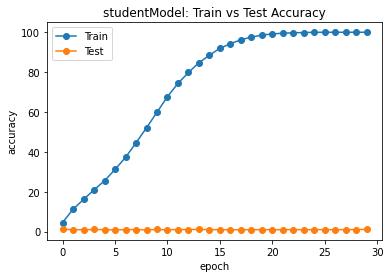

In [71]:
plt.plot(train_accuracy, '-o')
plt.plot(test_accuracy, '-o')
plt.legend(['Train','Test'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('studentModel: Train vs Test Accuracy')
plt.show()

In [72]:
studentModelScores = pd.DataFrame({"train_accuracy":train_accuracy, "test_accuracy":test_accuracy})
studentModelScores

,train_accuracy,test_accuracy
0,4.5400,1.100220
1,11.1950,0.980196
2,16.1400,0.910182
3,20.9300,1.070214
4,25.5025,1.000200
5,31.1575,0.870174
6,37.2250,0.980196
7,44.5000,1.040208
8,52.0725,0.850170
9,59.8700,1.060212


In [77]:
studentModelScores.iloc[1::2,:]

,train_accuracy,test_accuracy
1,11.1950,0.980196
3,20.9300,1.070214
5,31.1575,0.870174
7,44.5000,1.040208
9,59.8700,1.060212
11,74.3575,1.050210
13,84.7050,1.130226
15,91.9775,0.980196
17,96.2525,0.940188
19,98.5675,0.980196


In [74]:
studentModelScores["test_accuracy"].mean()

0.9875308395012335

In [76]:
np.mean(np.array([0.780156,
0.780156,
0.920184,
0.850170,
0.820164,
0.840168,
0.820164,
0.990198,
0.890178,
0.960192,
0.850170,
0.870174,
0.830166,
0.800160,
0.780156,
0.710142,
0.860172,
1.100220,
1.020204,
1.030206,
1.000200,
1.080216,
1.110222,
0.960192,
0.810162,
0.960192,
0.980196,
1.000200,
0.980196,
0.910182]))

0.9098485999999999